**Section 3:** We do Population prediction:
* First method for prediction is SARIMAX to forecast the population until 2050.
* Second method for prediction is Random forerest time series, this method does not bring the value of population but it is comparing the actual value and the predicted value of population. 

In [105]:
# Data Manipulation
import pandas    as pd
from pandas      import concat

import numpy     as np
from numpy       import asarray

# Visualiazation
from pylab                   import rcParams
import matplotlib.pyplot     as plt
import seaborn               as sns
import plotly.express        as px

# Time Series 
from statsmodels.graphics.tsaplots        import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax   import SARIMAX

from sklearn.metrics                      import mean_squared_error


In [106]:
# Set plot size 
rcParams['figure.figsize'] = 10, 6

## Loading data, transforming, and cleaning

In [107]:
# loading the population of world from 1997 to 2020
data=pd.read_excel("population.xlsx")
data.head(5)

,Series Name,Series Code,Country Name,Country Code,1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,"Population, total",SP.POP.TOTL,World,WLD,5.872284,5.954004,6.034484,6.114324,6.193664,6.272724,...,7.00376,7.089255,7.1755,7.261847,7.347679,7.433569,7.519183,7.602433,7.683438,7.763499


In [108]:
# Drop columns named Series Name, and Series Code
data.drop(columns = ["Series Name","Series Code"], inplace=True)
data.columns

Index(['Country Name', 'Country Code', '1997 [YR1997]', '1998 [YR1998]',
       '1999 [YR1999]', '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]',
       '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]',
       '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]',
       '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]',
       '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]',
       '2019 [YR2019]', '2020 [YR2020]'],
      dtype='object')

In [109]:
# Change the names of columns into shorter names 
data.columns=['Country Name', 'Country Code', '1997', '1998', '1999','2000','2001','2002','2003','2004','2005','2006',
              '2007','2008','2009','2010','2011','2012', '2013','2014','2015','2016', '2017', '2018','2019','2020']
data.head(2)

,Country Name,Country Code,1997,1998,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,World,WLD,5.872284,5.954004,6.034484,6.114324,6.193664,6.272724,6.351856,6.431527,...,7.00376,7.089255,7.1755,7.261847,7.347679,7.433569,7.519183,7.602433,7.683438,7.763499


In [110]:
# Getting the year list in order to do time series prediction for population
year_list=['1997', '1998', '1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010',
           '2011','2012', '2013','2014','2015','2016', '2017', '2018','2019','2020']


new_data=pd.melt(data,id_vars=["Country Name","Country Code"],value_vars=year_list)
new_data.head()

,Country Name,Country Code,variable,value
0,World,WLD,1997,5.872284
1,World,WLD,1998,5.954004
2,World,WLD,1999,6.034484
3,World,WLD,2000,6.114324
4,World,WLD,2001,6.193664


In [111]:
# Defining the name of Variable is Year, and Value is Population
new_data["Population"] = new_data["value"]
new_data["Year"]=new_data["variable"].astype(int)
new_data.drop(columns = ["Country Name","Country Code","variable","value"], inplace=True)

print('Shape of the data= ', new_data.shape)
print('Column datatypes= \n',new_data.dtypes)

# Defining the name of dataset as new_data
new_data[['Year', 'Population']]

Shape of the data=  (24, 2)
Column datatypes= 
 Population    float64
Year            int32
dtype: object


,Year,Population
0,1997,5.872284
1,1998,5.954004
2,1999,6.034484
3,2000,6.114324
4,2001,6.193664
5,2002,6.272724
6,2003,6.351856
7,2004,6.431527
8,2005,6.511725
9,2006,6.592712


In [112]:
# Getting the indexs of population corresponds to each year
new_data = new_data.set_index(new_data.Year)
new_data.drop('Year', axis = 1, inplace = True)
print('Column datatypes= \n',new_data.dtypes)
new_data

Column datatypes= 
 Population    float64
dtype: object


,Population
Year,
1997,5.872284
1998,5.954004
1999,6.034484
2000,6.114324
2001,6.193664
2002,6.272724
2003,6.351856
2004,6.431527
2005,6.511725


Text(0.5, 1.0, 'Trend of the Time Series of Population')

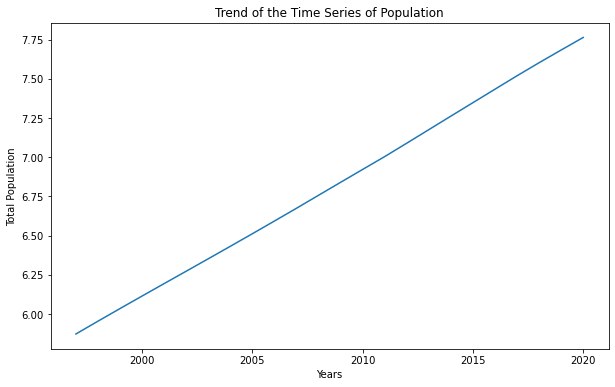

In [113]:
# Plotting the population 
plt.plot(new_data)
plt.xlabel('Years')
plt.ylabel('Total Population')
plt.title('Trend of the Time Series of Population')

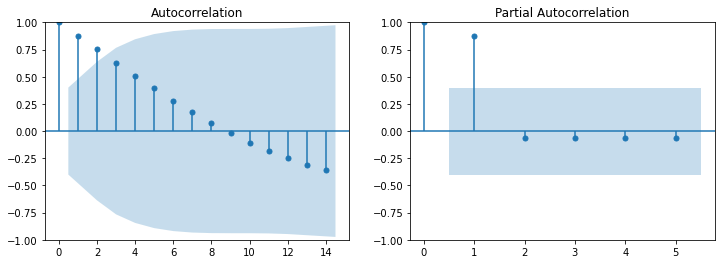

In [114]:
# Ploting Autocorrelation and Partial Autocorrelation for Population
fig, ax = plt.subplots(1,2,figsize= (12,4))
plot_acf(new_data,ax=ax[0])
plot_pacf(new_data,ax=ax[1], lags=5, method='ywm')
plt.show()

**ADF (Augmented Dickey Fuller) Test** is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test are:

* Null Hypothesis: The series is non-stationary or series has a unit root.

* Alternative Hypothesis: The series is stationary or series has no unit root.

In [115]:
# Defining the stationarity test function
def stationarity_test(timeseries): 
    # Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    df_test = adfuller(timeseries)
    df_output = pd.Series(df_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items ():
        df_output['Critical Value (%s)' %key] = value
    print(df_output)
    
stationarity_test(new_data)

Results of Dickey-Fuller Test
Test Statistic                 -0.305729
p-value                         0.924689
#Lags Used                      1.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


Since the p-value of ADF test is high than 5%, or test statistic is greater than the critical value, so we fail to reject the null hypothesis, it means that the time series is non-stationary. 

Because time series is not stationary so we apply transformation (log) different

In [116]:
new_data['data_log'] = np.log(new_data['Population'].values)
new_data['data_log_diff'] = new_data['data_log'].diff(1).values
new_data.head()

,Population,data_log,data_log_diff
Year,,,
1997,5.872284,1.770244,NaN
1998,5.954004,1.784064,0.013820
1999,6.034484,1.797490,0.013426
2000,6.114324,1.810634,0.013144
2001,6.193664,1.823527,0.012893


In [117]:
# Model Definition
model = SARIMAX(new_data["data_log_diff"].dropna(), order = (2,1,1))
# Model Training
model_fit = model.fit()
# Summary of the model built
model_fit.summary()

C:\Users\user\.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\user\.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\user\.conda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          data_log_diff   No. Observations:                   23
Model:               SARIMAX(2, 1, 1)   Log Likelihood                 159.365
Date:                Mon, 06 Jun 2022   AIC                           -310.729
Time:                        18:02:47   BIC                           -306.365
Sample:                             0   HQIC                          -309.701
                                 - 23                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9421      0.066     14.343      0.000       0.813       1.071
ar.L2         -0.1173      0.050     -2.364      0.018      -0.214      -0.020
ma.L1         -0.4477      0.035    -12.740      0.000      -0.517      -0.379
sigma2      2.878e-08   6.72e-09      4.286      0.000    1.56e-08    4.19e-08
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                21.39
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               1.72   Skew:                             1.38
Prob(H) (two-sided):                  0.49   Kurtosis:                         6.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.69e+16. Standard errors may be unstable.
"""

* The SARIMAX() function is used to define the ARMA(1, 1) model by passing the transformed Population series and the appropriate order as the arguments. The model is trained using the fit() method on the model definition. The summary table is displayed by using the summary() method on the fitted model.

* The P>|Z| column of the summary table shows that all the coefficients of this model are significant. Next, this model is used to generate predictions for the transformed series, and then for the original population series.

### Time series forecasting

In [118]:
# We split dataset into training set and test set
train_df = new_data.loc[:"2009"]
test_df = new_data.loc["2010":]

print("Training Set Shape - ", train_df.shape)
print("Testing Set Shape - ", test_df.shape)

Training Set Shape -  (13, 3)
Testing Set Shape -  (11, 3)


The data of population from 1997 to 2009 uses in the training set. The data of population from 2010 to 2020 uses in the test set.

In [119]:
# Building a predictions dataframe for storing all prediction data
pred_df = pd.DataFrame(columns = ["Population", "Population_lag_1", 
                                  "model_preds", "model_preds_exp", "ppl_preds"],index = new_data.index)


# Storing the original series and one lagged version (y(t) and y(t-1))
pred_df["Population"] = new_data["Population"]
pred_df["Population_lag_1"] = pred_df["Population"].shift(1)


# Predictions on transformed data over the full span of the dataset.
pred_df["model_preds"] = model_fit.predict(start = train_df.index[1], end = test_df.index[-1])


# Taking Exponent to invert logarithmic effect (exp(y_new(t)))
pred_df["model_preds_exp"] = np.exp(pred_df["model_preds"].values)


# Multiplying with past lags to get the forecast (y(t-1) * exp(y_new(t)))
pred_df["ppl_preds"] = pred_df["model_preds_exp"] * pred_df["Population_lag_1"]



C:\Users\user\.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



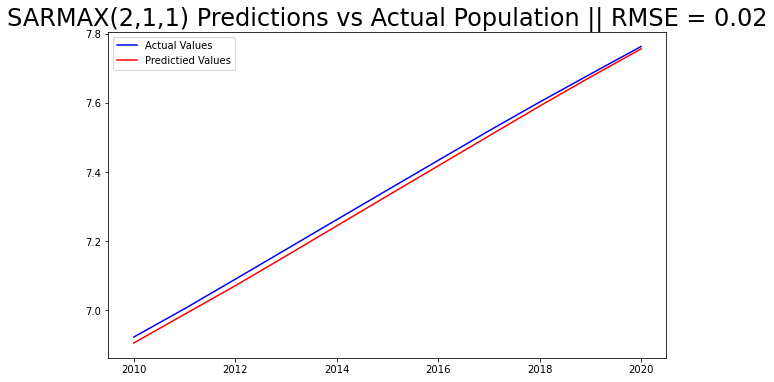

In [120]:
# RMSE Metric Calculation
rmse = np.round(np.sqrt(
                    mean_squared_error(y_true = pred_df.loc[test_df.index, "Population"].values, 
                                       y_pred = pred_df.loc[test_df.index, "ppl_preds"].values)), 2)

# Plottting Actual Test Set Values
plt.plot(pred_df.loc[test_df.index, "Population"], color = "blue", label = "Actual Values")

# Plotting Predictions and Confidence Intervals
plt.plot(pred_df.loc[test_df.index, "ppl_preds"], color = "red", label = "Predictied Values")

# Setting the Title
plt.title(f"SARMAX(2,1,1) Predictions vs Actual Population || RMSE = {rmse}", size = 24)

# Displaying the labels and plot
plt.legend()
plt.show()


In [121]:
pred_df.head()

,Population,Population_lag_1,model_preds,model_preds_exp,ppl_preds
Year,,,,,
1997,5.872284,NaN,NaN,NaN,NaN
1998,5.954004,5.872284,0.009468,1.009513,5.928145
1999,6.034484,5.954004,0.009468,1.009513,6.010642
2000,6.114324,6.034484,0.009468,1.009513,6.091887
2001,6.193664,6.114324,0.009468,1.009513,6.172487


In [122]:
model_SARIMA = SARIMAX(np.asarray(pred_df["ppl_preds"]), order = (2,1,1))
model_fit_SARIMA=model_SARIMA.fit()


start_index = len(new_data.loc[:"2020"])
end_index = start_index + 29
model_prediction = model_fit_SARIMA.predict(start=start_index, end=end_index)

forecast_year_range= pd.date_range("2021", "2050", freq="YS")


df_forecast =pd.DataFrame(model_prediction, columns=['Forecast'])
df_forecast['Year'] = forecast_year_range
df_forecast[['Year', 'Forecast']]

C:\Users\user\.conda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



,Year,Forecast
0,2021-01-01,7.837452
1,2022-01-01,7.918080
2,2023-01-01,7.998601
3,2024-01-01,8.079080
4,2025-01-01,8.159539
5,2026-01-01,8.239985
6,2027-01-01,8.320422
7,2028-01-01,8.400851
8,2029-01-01,8.481270
9,2030-01-01,8.561681


**By 2050, the world population is 10.168151 billion people**

In [123]:
# Plot
fig = px.line(df_forecast, y="Forecast", x='Year')
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Population')
fig.update_layout(title_text='Forecasting of population until 2050')
fig.show()